In [ ]:
# load your data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Acces to the folder 
FolderName = 'Colab Notebooks'
path_config_file = '/content/drive/My Drive/'+FolderName+'/AUDITION_2000ms/'
path_config_file

'/content/drive/My Drive/Colab Notebooks/AUDITION_2000ms/'

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# visualize a few raw datapoints to get an idea about your "raw" data
# The libraries needed
import os
import scipy.io as sio
from os.path import dirname, join as pjoin
import numpy as np
import librosa

# list all the files that are part of the dataset
all_filenames = os.listdir(path_config_file)
#all_mats = [i for i in os.listdir(path_config_file) if 'mat' in i]

# load the time-series data in each data file
all_mats = [sio.loadmat(pjoin(path_config_file,mat)) for mat in all_filenames]

# data contains 2595 points, remember that each iteration has 519 points

In [ ]:
# Stimuli by iteration = file number, we get a 3D array
s_IT1 = all_mats[0]['Sr']
s_IT2 = all_mats[1]['Sr']
s_IT3 = all_mats[2]['Sr']
s_IT4 = all_mats[3]['Sr']
s_IT5 = all_mats[4]['Sr']

# Responses by iteration = file number
r_IT1 = all_mats[0]['Rr']
r_IT2 = all_mats[1]['Rr']
r_IT3 = all_mats[2]['Rr']
r_IT4 = all_mats[3]['Rr']
r_IT5 = all_mats[4]['Rr']

# Parameters of data
DUR = 2000
INTS = 3
REP = 5
PTS = INTS*REP+1
TRY_DUR = DUR*(REP+1)
nb_pts = s_IT5.shape[0]
IT = 5
pts4it = [num*nb_pts for num in range(IT)]

# PRE-PROCESSIG OF DATA
# Stims

finding0 = [idx for idx,data in enumerate(r_IT1) if len(r_IT1[idx][0][0]) < 14]
#print(finding0)

# delete all the empty or nan rows
nw_sIT1 = np.delete(s_IT1,finding0,0)
nw_sIT2 = np.delete(s_IT2,finding0,0)
nw_sIT3 = np.delete(s_IT3,finding0,0)
nw_sIT4 = np.delete(s_IT4,finding0,0)
nw_sIT5 = np.delete(s_IT5,finding0,0)

# Get only 1D array
sIT1 = np.array([nw_sIT1[i][0][0] for i in range(nw_sIT1.shape[0])])
sIT2 = np.array([nw_sIT2[i][0][0] for i in range(nw_sIT1.shape[0])])
sIT3 = np.array([nw_sIT3[i][0][0] for i in range(nw_sIT1.shape[0])])
sIT4 = np.array([nw_sIT4[i][0][0] for i in range(nw_sIT1.shape[0])])
sIT5 = np.array([nw_sIT5[i][0][0] for i in range(nw_sIT1.shape[0])])

# Responses

# delete all the empty or nan rows
nw_rIT1 = np.delete(r_IT1,finding0,0)
nw_rIT2 = np.delete(r_IT2,finding0,0)
nw_rIT3 = np.delete(r_IT3,finding0,0)
nw_rIT4 = np.delete(r_IT4,finding0,0)
nw_rIT5 = np.delete(r_IT5,finding0,0)
# Get only 1D array
rIT1 = [nw_rIT1[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT2 = [nw_rIT2[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT3 = [nw_rIT3[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT4 = [nw_rIT4[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT5 = [nw_rIT5[i][0][0] for i in range(nw_sIT1.shape[0])]


# Get only the seed rhythm
seed1 = [s[:INTS+1] for idx,s in enumerate(sIT1)]
rh_seed = np.diff(seed1, axis=1)/1000
seed2 = [s[:INTS+1] for idx,s in enumerate(sIT2)]
rh_seed2 = np.diff(seed2, axis=1)/1000
seed3 = [s[:INTS+1] for idx,s in enumerate(sIT3)]
rh_seed3 = np.diff(seed3, axis=1)/1000
seed4 = [s[:INTS+1] for idx,s in enumerate(sIT4)]
rh_seed4 = np.diff(seed4, axis=1)/1000
seed5 = [s[:INTS+1] for idx,s in enumerate(sIT5)]
rh_seed5 = np.diff(seed5, axis=1)/1000

In [ ]:
# Full set of first rhythms
all_seeds_input = np.concatenate((seed1,seed2,seed3,seed4), axis=0)/1000
all_seeds_output = np.concatenate((seed2,seed3,seed4,seed5), axis=0)/1000 

# print('This is 0:',all_seeds_input[401])
# print('This is 4:',all_seeds_input[[-1]])
# print('This is 5 out:',all_seeds_output[-1])

In [ ]:
from numpy.random.mtrand import seed
# Each time is a click, so construct a click sound
print(sIT1[0]/1000)
sr = 22050
# x = librosa.clicks(sIT1[0],sr,click_duration=0.055,length=len(sIT1[0])) #
x = librosa.clicks(sIT1[0]/1000,frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
rh = librosa.clicks(all_seeds_input[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)

[ 0.575  1.275  1.825  2.575  3.275  3.825  4.575  5.275  5.825  6.575
  7.275  7.825  8.575  9.275  9.825 10.575]


In [ ]:
import IPython.display as ipd
ipd.Audio(x, rate=sr) 

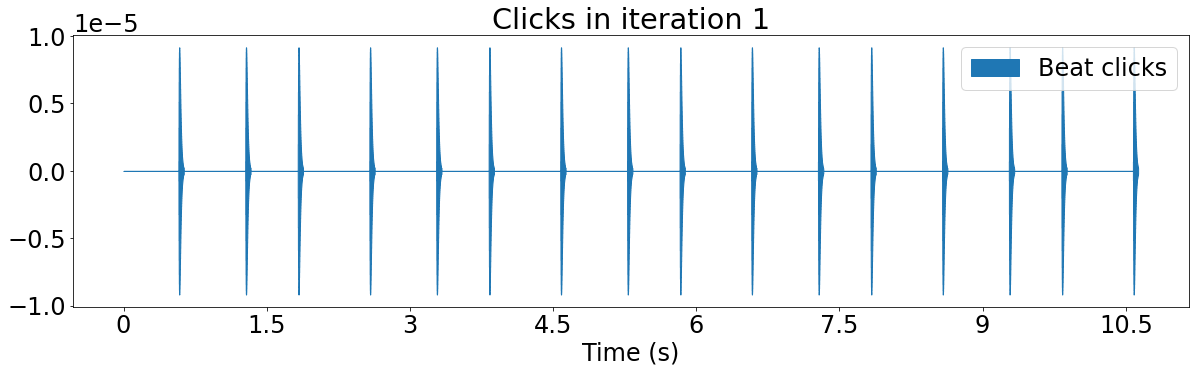

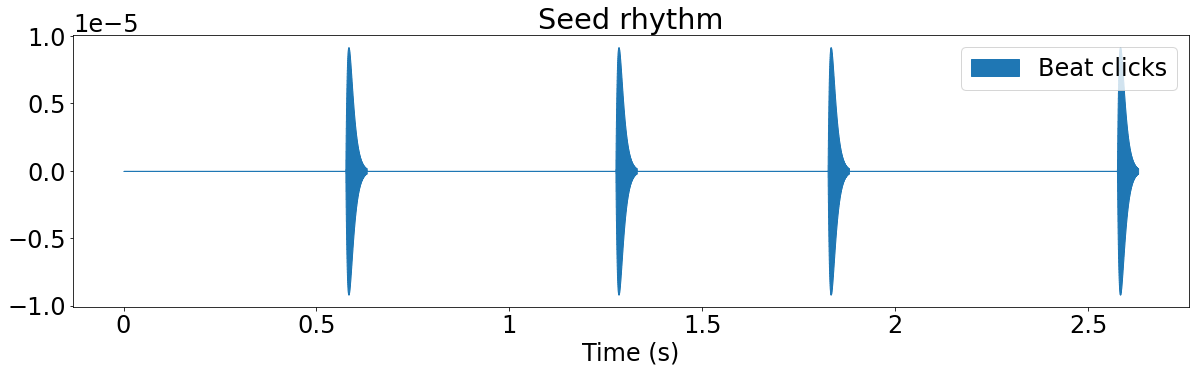

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(20, 5))
plt.title('Clicks in iteration 1')

librosa.display.waveshow(x, sr=sr,x_axis='s',label='Beat clicks')
plt.legend()

plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(20, 5))
plt.title('Seed rhythm')

librosa.display.waveshow(rh, sr=sr,x_axis='s',label='Beat clicks')
plt.legend()


In [ ]:
# Data for autoencoder - clicks
# randomly separate the seeds into test, validation, and training sets 

N_seeds = len(all_seeds_input)

seed_idx = np.random.choice(N_seeds,N_seeds,replace=False)

ts_seeds_in = np.array([all_seeds_input[i] for i in seed_idx[-80:]])
vl_seeds_in = np.array([all_seeds_input[i] for i in seed_idx[1368:1528]])
tr_seeds_in = np.array([all_seeds_input[i] for i in seed_idx[:1368]])

ts_seeds_out = np.array([all_seeds_output[i] for i in seed_idx[-80:]])
vl_seeds_out = np.array([all_seeds_output[i] for i in seed_idx[1368:1528]])
tr_seeds_out = np.array([all_seeds_output[i] for i in seed_idx[:1368]])


print(tr_seeds_in[0])
print(tr_seeds_out[0])

[0.574 1.079 2.162 2.574]
[0.583 1.026 2.097 2.583]


In [ ]:
import keras
from keras import layers


# parameters
lr = 6e-06
ep = 5000 #number of epochs
batch_sz = 32
reg = 0.0 # regularizer
r_drp = 0.2 #rate dropout

# This is the size of our encoded representations
encoding_dim = 2 
initializer = tf.keras.initializers.RandomUniform(minval=-0.3, maxval=0.3)

encoder_input = keras.Input(shape=(tr_seeds_in.shape[1],), name='input')
h0 = keras.layers.Dense(576,kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(encoder_input)  
h1 = keras.layers.Dense(144,kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(h0)
drp1 = keras.layers.Dropout(r_drp)(h1)
encoder_output = keras.layers.Dense(encoding_dim,kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(drp1)

h2 = keras.layers.Dense(144,kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(encoder_output)
h3 = keras.layers.Dense(576,kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(h2)
drp2 = keras.layers.Dropout(r_drp)(h3)
decoder_output = keras.layers.Dense(tr_seeds_out.shape[1],kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.L2(reg),activation='relu')(drp2)

# Autoencoder model
opt = tf.keras.optimizers.Adam(learning_rate=lr)
autoencoder = keras.Model(encoder_input,decoder_output,name='autoencoder') 


# Model configuration
autoencoder.compile(loss='mse',optimizer=opt)

# visualize the architecture
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense_24 (Dense)            (None, 576)               2880      
                                                                 
 dense_25 (Dense)            (None, 144)               83088     
                                                                 
 dropout_8 (Dropout)         (None, 144)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 290       
                                                                 
 dense_27 (Dense)            (None, 144)               432       
                                                                 
 dense_28 (Dense)            (None, 576)               

In [ ]:
# Encoder
encoder = keras.Model(encoder_input,encoder_output,name='encoder')

encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense_24 (Dense)            (None, 576)               2880      
                                                                 
 dense_25 (Dense)            (None, 144)               83088     
                                                                 
 dropout_8 (Dropout)         (None, 144)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 290       
                                                                 
Total params: 86,258
Trainable params: 86,258
Non-trainable params: 0
_________________________________________________________________


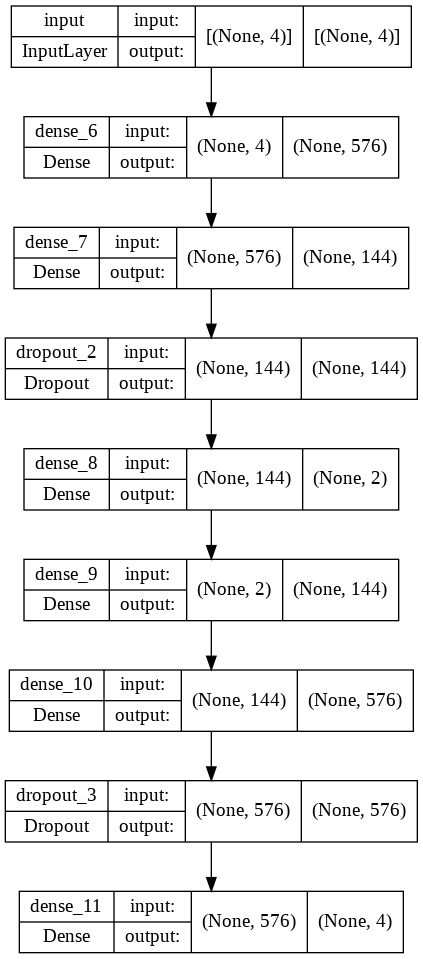

In [ ]:
tf.keras.utils.plot_model(autoencoder, "autoencoder_with_info.png",show_shapes=True)

In [ ]:
# to save our best model, we will make use of model checkpoints.
# a model checkpoint saves the model as a file, and we can ensure that
# we save the model that best performs on the validation (or training) data.

# to use model checkpoints, we need to define a "callback". A callback is a method
# that will monitor model performance during training to save the checkpoint

autoencoder_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'autoencoder_chk/checkpoint',    # the location where we will save the checkpoint file 
    save_weights_only = True,                
    monitor='val_loss',
    mode='max',
    save_best_only=True
)

# Autoencoder training
tr_logs = autoencoder.fit(tr_seeds_in, tr_seeds_out,
                          epochs=ep,
                          callbacks=[autoencoder_checkpoint_callback],
                          batch_size= batch_sz,
                          shuffle=True,
                          validation_data=(vl_seeds_in, vl_seeds_out))

Se han truncado las últimas 5000 líneas del flujo de salida.
43/43 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0023
Epoch 2502/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 2503/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 2504/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 2505/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 2506/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 2507/5000
43/43 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0023
Epoch 2508/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 2509/5000
43/43 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0022
Epoch 2510/5000
43/43 [=====

In [ ]:
# SIDENOTE: since you saved model checkpoints, your best neural network model can easily be
# re-built using this line of code (assuming that your model architecture has been defined)
w_ae = autoencoder.load_weights('autoencoder_chk/checkpoint')

# so if you have a model that you like, you can use it in the future without 
# needing to train it again from scratch. 

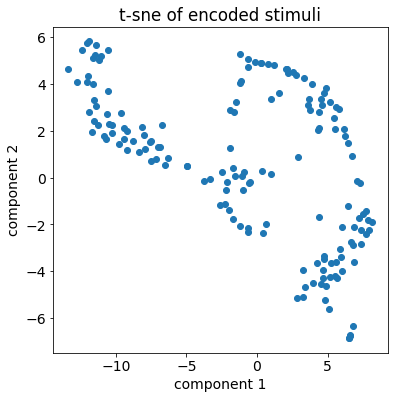

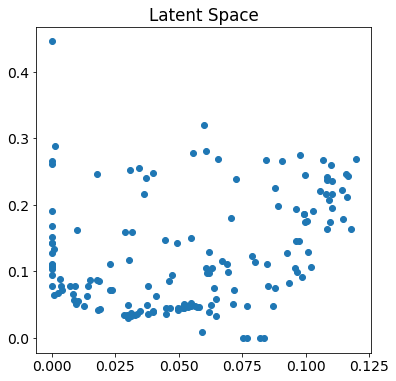

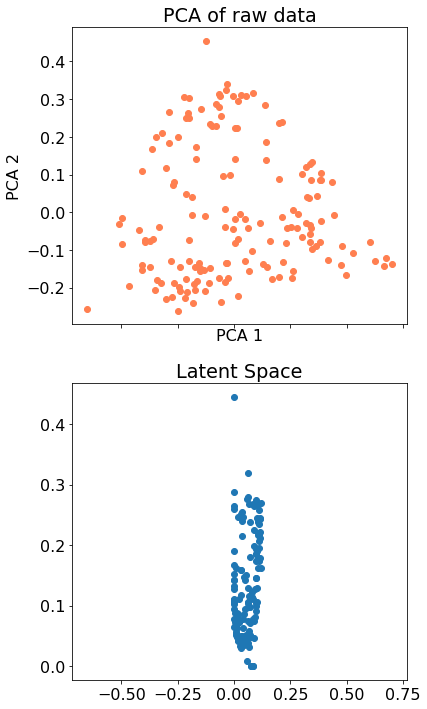

In [ ]:
encoded_rh = encoder.predict(vl_seeds_in)
#print(encoded_rh)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.rcParams.update({'font.size': 14})
# STIMULI
# t-sne plotting
X_embedded1 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(encoded_rh)

plt.figure(figsize=(6,6))
plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1])
plt.title('t-sne of encoded stimuli')
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

plt.figure(figsize=(6,6))
plt.scatter(encoded_rh[:,0],encoded_rh[:,1])
plt.title('Latent Space')

pca = PCA(n_components=2)
encoder_pca = pca.fit_transform(vl_seeds_in)
var_encoder = pca.explained_variance_ratio_
#print(encoder_pca)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(2,1,sharex=True,figsize=(6,12))
axs[0].scatter(encoder_pca[:,0],encoder_pca[:,1],c='coral')
axs[0].set_title('PCA of raw data')
axs[0].set(xlabel='PCA 1')
axs[0].set(ylabel='PCA 2')
axs[1].scatter(encoded_rh[:,0],encoded_rh[:,1])
axs[1].set_title('Latent Space')
plt.show()


#plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
#plt.show()

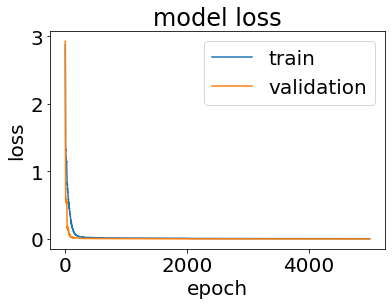

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.rcParams.update({'font.size': 20})
plt.plot(tr_logs.history['loss'])
plt.plot(tr_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

[[0.57030565 1.415738   1.8372867  2.569552  ]] [[0.5697412 1.4258766 1.8504018 2.5696452]] [[0.5698942 1.4378747 1.8590325 2.5703633]] [[0.57001925 1.4518268  1.8665346  2.571084  ]] [[0.5703032 1.4658958 1.8724976 2.5712686]]


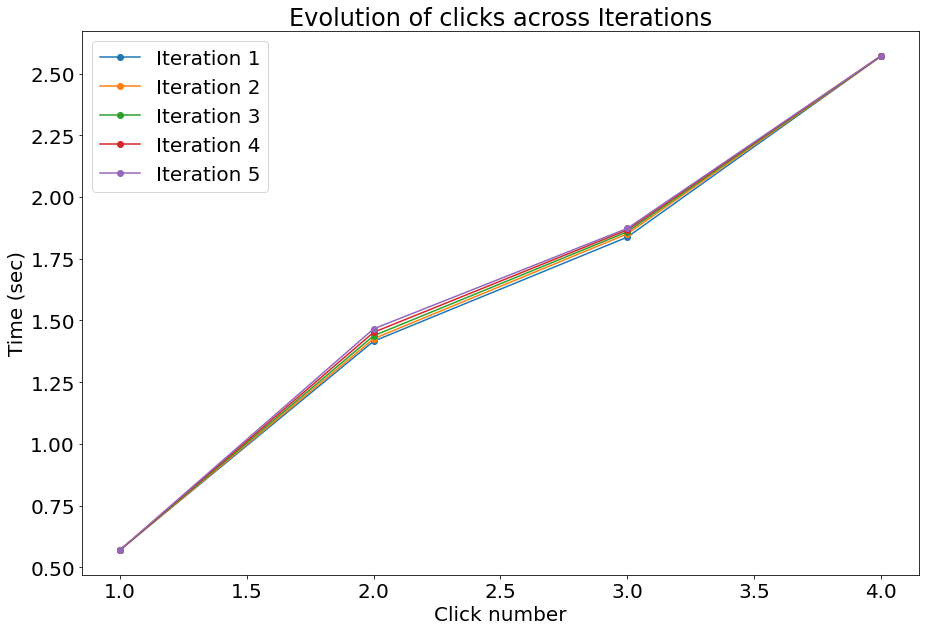

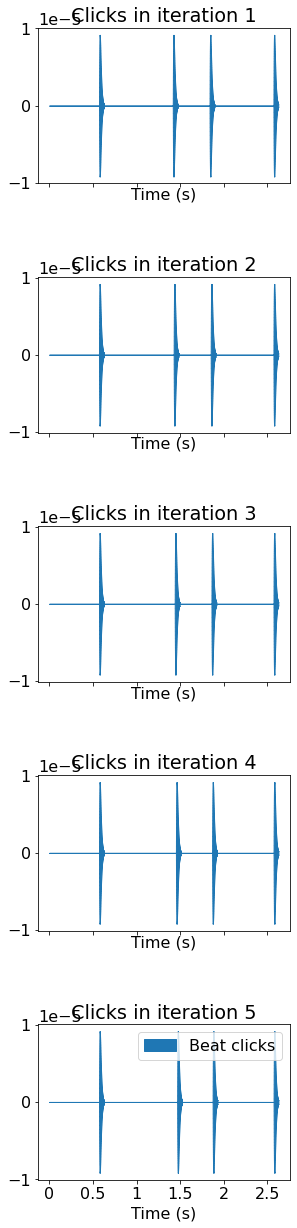

[[0.57030565 1.415738   1.8372867  2.569552  ]]
[[0.5697412 1.4258766 1.8504018 2.5696452]]
[[0.5698942 1.4378747 1.8590325 2.5703633]]
[[0.57001925 1.4518268  1.8665346  2.571084  ]]
[[0.5703032 1.4658958 1.8724976 2.5712686]]


In [ ]:
import matplotlib.gridspec as gridspec

n = 0
# # rhythm = [0.5, 0.75, 0.3, 0.45]

it = autoencoder.predict(ts_seeds_in)
it1 = np.reshape(it[n],(1,tr_seeds_in.shape[1])) 
#it1 = np.reshape(ts_seeds_in[n],(1,tr_seeds_in.shape[1]))
it2 = autoencoder.predict(it1)
it3 = autoencoder.predict(it2)
it4 = autoencoder.predict(it3)
it5 = autoencoder.predict(it4)
print(it1,it2,it3,it4,it5)

# pts = np.reshape(np.array([1, 2, 3, 4]),(1,tr_seeds_in.shape[1]))



# n = 0
# rhythm = np.array([0.5, 1., 1.95, 2.5])
# pts = np.reshape(np.array([1, 2, 3, 4]),(1,tr_seeds_in.shape[1]))
pts = [1, 2, 3, 4]

plt.rcParams.update({'font.size': 20})
#fig, axs = plt.subplots(5,1,sharey=True,figsize=(5,20))
fig = plt.figure(figsize=(15,10))

# it = autoencoder.predict(ts_seeds_in)
# it1 = np.reshape(it[1],(1,tr_seeds_in.shape[1])) 
plt.plot(pts,it1[0],'o-',label='Iteration 1')
plt.plot(pts, it2[0],'o-',label='Iteration 2')
plt.plot(pts,it3[0],'o-',label='Iteration 3')
plt.plot(pts,it4[0],'o-',label='Iteration 4')
plt.plot(pts,it5[0],'o-',label='Iteration 5')
plt.title('Evolution of clicks across Iterations')
plt.xlabel('Click number')
plt.ylabel('Time (sec)')
plt.legend()

# print(it1)
# axs[0].plot(pts,it1[0],'b-o')
# axs[0].set_title('Clicks in iteration 1')
# axs[0].set(xlabel='Click number')
# axs[0].set(ylabel='Time (sec)')

# it2 = autoencoder.predict(it1)
# axs[1].plot(pts, it2[0],'r-o')
# axs[1].set_title('Clicks in iteration 2')
# axs[1].set(ylabel='Time (sec)')
# axs[1].set(xlabel='Click number')

# it3 = autoencoder.predict(it2)
# axs[2].plot(pts,it3[0],'g-s')
# axs[2].set_title('Clicks in iteration 3')
# axs[2].set(xlabel='Click number')
# axs[2].set(ylabel='Time (sec)')

# it4 = autoencoder.predict(it3)
# axs[3].plot(pts,it4[0],'m-s')
# axs[3].set_title('Clicks in iteration 4')
# axs[3].set(xlabel='Click number')
# axs[3].set(ylabel='Time (sec)')

# it5 = autoencoder.predict(it4)
# axs[4].plot(pts,it5[0],'k-s',label='clicks evolution')
# axs[4].set_title('Clicks in iteration 5')
# axs[4].set(xlabel='Click number')
# axs[4].set(ylabel='Time (sec)')


# plt.legend()
# # set the spacing between subplots
# plt.subplots_adjust(left=0.2,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.6)




plt.rcParams.update({'font.size': 16})
fig2, axs2 = plt.subplots(5,1,sharex=True,figsize=(5,20))
x1 = librosa.clicks(it1[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055) #librosa.clicks(rhythm,frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
axs2[0].set_title('Clicks in iteration 1')
librosa.display.waveshow(x1, sr=sr,x_axis='s',ax=axs2[0],label='Beat clicks')


x2 = librosa.clicks(it2[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
axs2[1].set_title('Clicks in iteration 2')
librosa.display.waveshow(x2, sr=sr,x_axis='s',ax=axs2[1],label='Beat clicks') 

x3 = librosa.clicks(it3[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
axs2[2].set_title('Clicks in iteration 3')
librosa.display.waveshow(x3, sr=sr,x_axis='s',ax=axs2[2],label='Beat clicks') 


x4 = librosa.clicks(it4[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
axs2[3].set_title('Clicks in iteration 4')
librosa.display.waveshow(x4, sr=sr,x_axis='s',ax=axs2[3],label='Beat clicks') 


x5 = librosa.clicks(it5[0],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
axs2[4].set_title('Clicks in iteration 5')
librosa.display.waveshow(x5, sr=sr,x_axis='s',ax=axs2[4],label='Beat clicks') 

plt.legend()





# fig.set_figheight(7)
# fig.set_figwidth(5)
#fig.suptitle('Vertically stacked subplots')

 



# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)

plt.show()

print(it1)
print(it2)
print(it3)
print(it4)
print(it5)

In [ ]:
it1_real = np.reshape(tr_seeds_in[n],(1,tr_seeds_in.shape[1]))
it1_real = np.reshape(tr_seeds_in[n],(1,tr_seeds_in.shape[1]))
it1_real = np.reshape(tr_seeds_in[n],(1,tr_seeds_in.shape[1]))
it1_real = np.reshape(tr_seeds_in[n],(1,tr_seeds_in.shape[1]))
it1_real = np.reshape(tr_seeds_in[n],(1,tr_seeds_in.shape[1]))

tr_seed IT1:  [0.643 1.06  1.391 2.643]
tr_seed IT1 out:  [0.57  1.153 1.486 2.57 ]
tr_seed IT2:  [0.576 1.05  1.481 2.576]
tr_seed IT2 out:  [0.571 1.096 1.592 2.571]
tr_seed IT1:  [0.573 0.971 1.469 2.573]
tr_seed IT1:  [0.563 0.989 1.46  2.563]


No handles with labels found to put in legend.


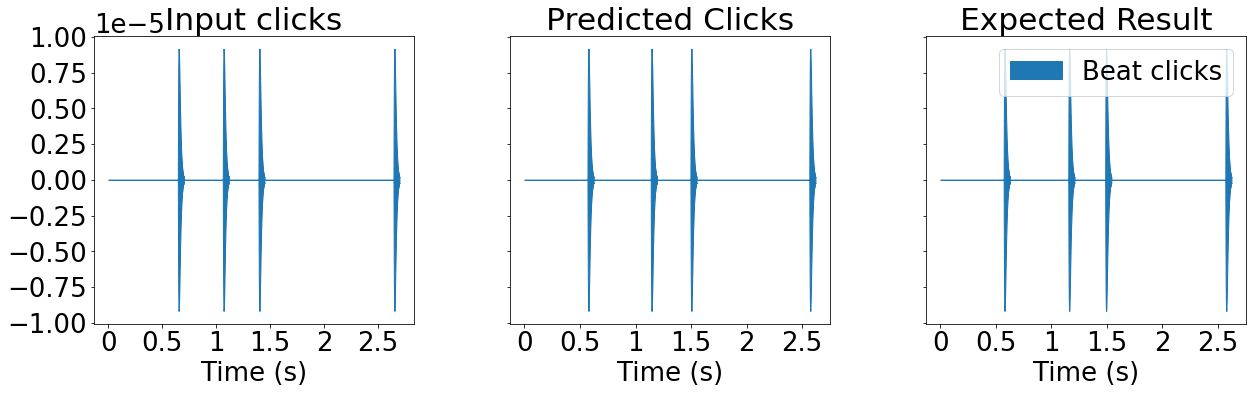

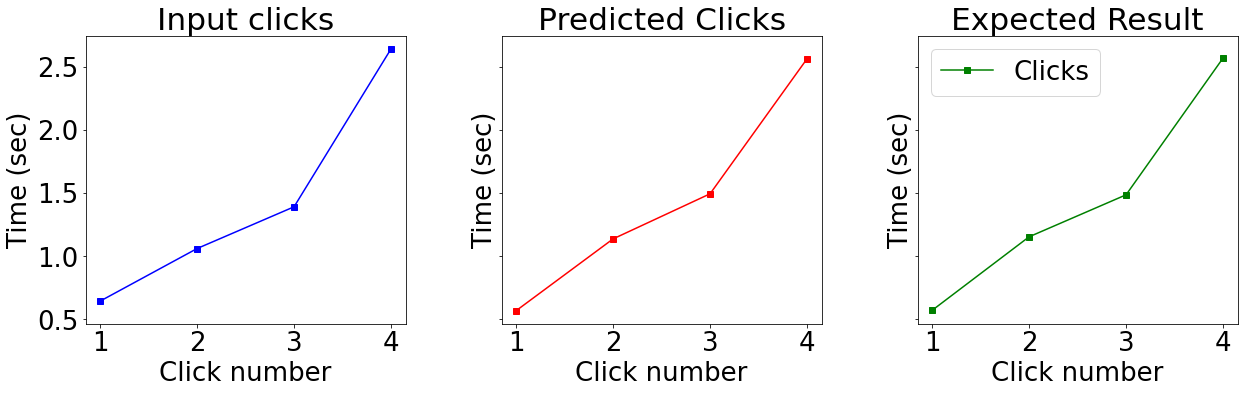

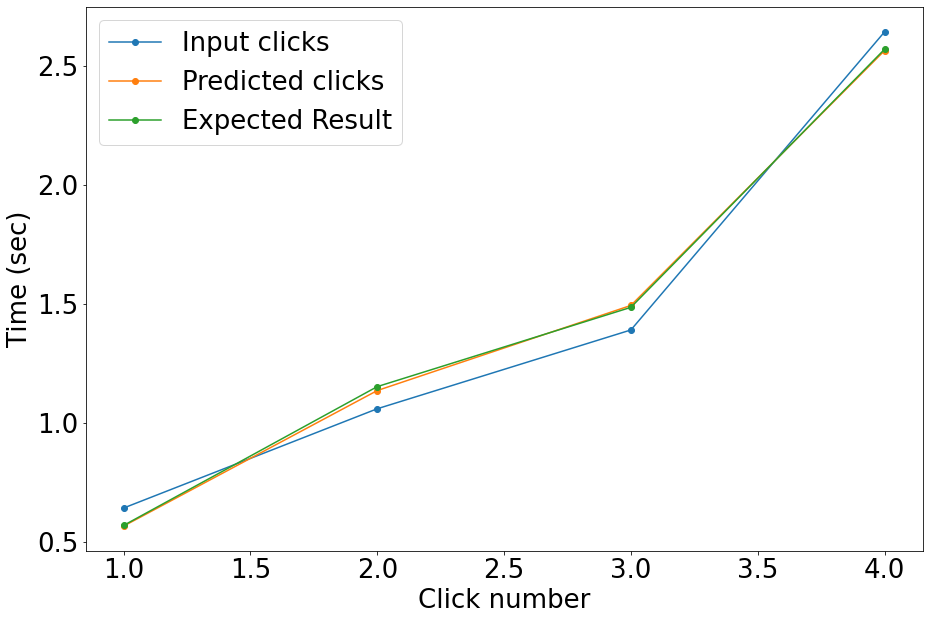

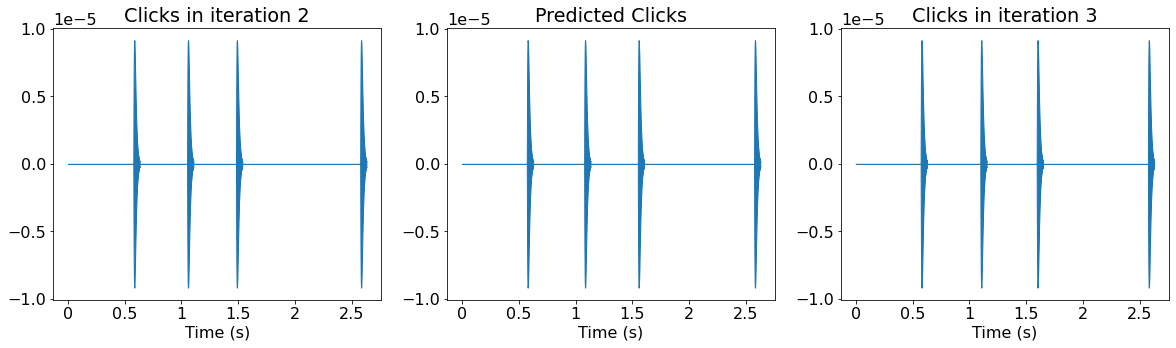

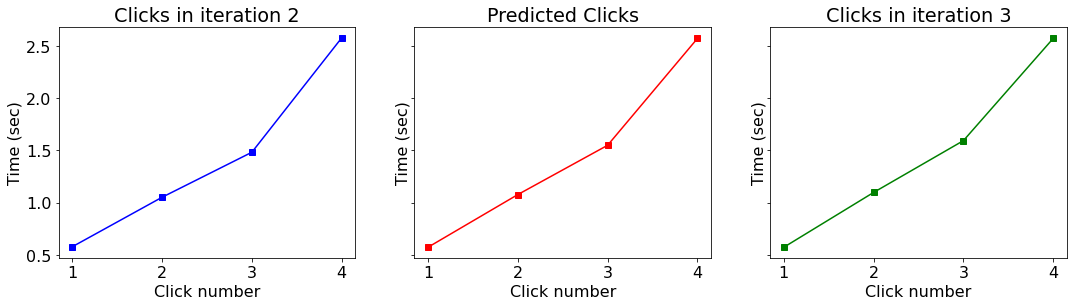

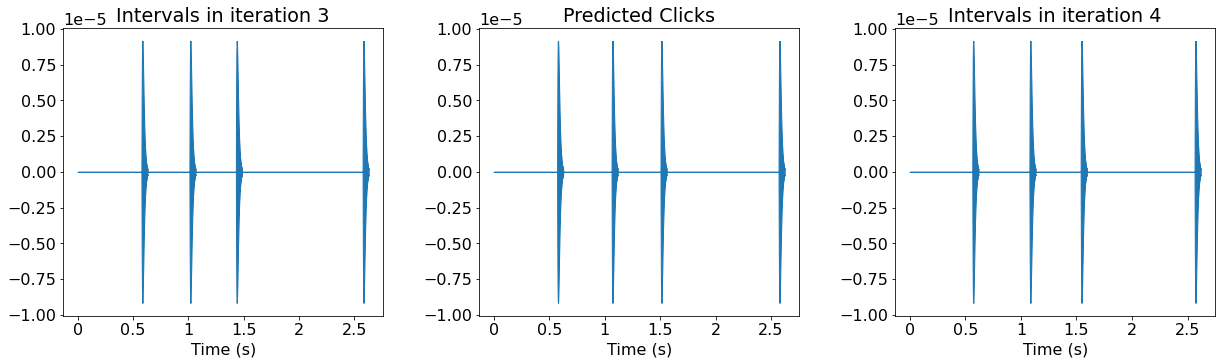

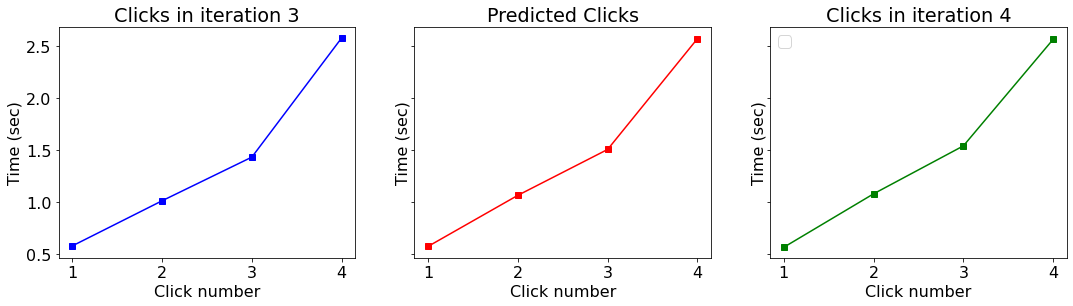

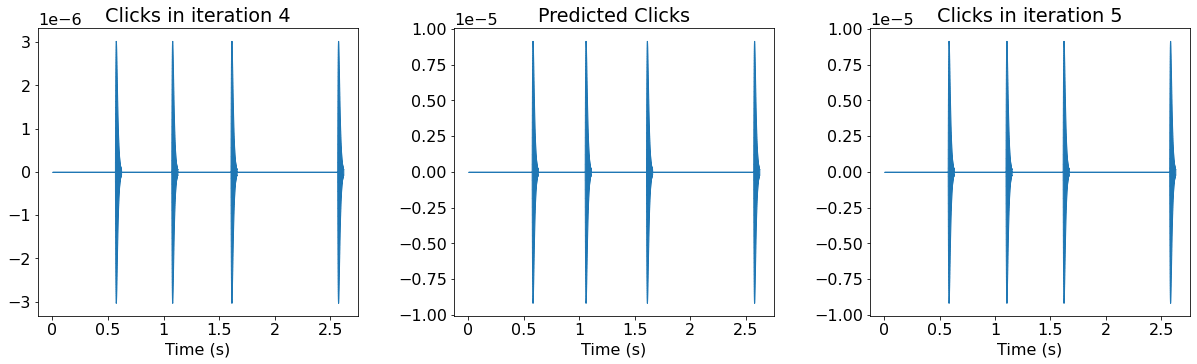

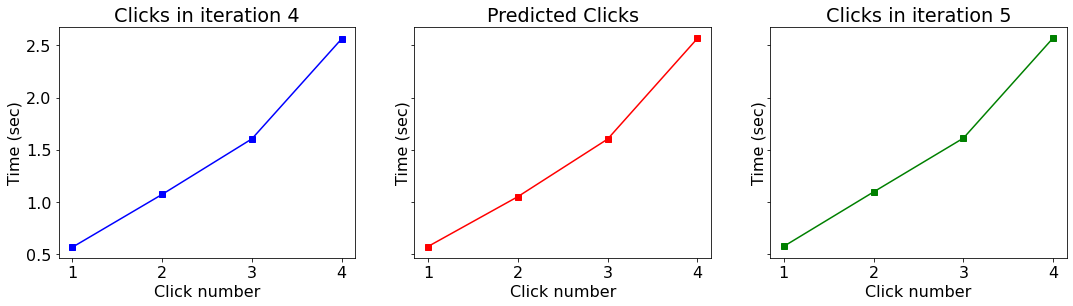

In [ ]:
# Each time is a click, so construct a click sound
n = 10
n_data4IT = int(ts_seeds_in.shape[0]/4)  #number of samples for iteration
rh_autoencoder = autoencoder.predict(ts_seeds_in)
p =[1, 2, 3, 4] 
# ITERATION 1-2
print('tr_seed IT1: ',ts_seeds_in[n])
print('tr_seed IT1 out: ',ts_seeds_out[n])
plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(1,3,sharey=True,figsize=(20,5))

x1 = librosa.clicks(ts_seeds_in[n],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[0].set_title('Input clicks')
librosa.display.waveshow(x1, sr=sr,x_axis='s',ax=ax[0],label='Beat clicks')

x2 = librosa.clicks(rh_autoencoder[n],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[1].set_title('Predicted Clicks')
librosa.display.waveshow(x2, sr=sr,x_axis='s',ax=ax[1],label='Beat clicks')

x3 = librosa.clicks(ts_seeds_out[n],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[2].set_title('Expected Result')
librosa.display.waveshow(x3, sr=sr,x_axis='s',ax=ax[2],label='Beat clicks')

plt.legend()
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)


plt.rcParams.update({'font.size': 26})
fig, axs = plt.subplots(1,3,sharey=True,figsize=(20,5))
# fig.set_figheight(7)
# fig.set_figwidth(5)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(p,ts_seeds_in[n],'b-s')
axs[0].set_title('Input clicks')
axs[0].set(xlabel='Click number')
axs[0].set(ylabel='Time (sec)')
axs[1].plot(p,rh_autoencoder[n],'r-s')
axs[1].set_title('Predicted Clicks')
axs[1].set(ylabel='Time (sec)')
axs[1].set(xlabel='Click number')  
axs[2].plot(p,ts_seeds_out[n],'g-s',label='Clicks')
axs[2].set_title('Expected Result')
axs[2].set(xlabel='Click number')
axs[2].set(ylabel='Time (sec)')

plt.legend()
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

fig1 = plt.figure(figsize=(15,10))
plt.plot(p,ts_seeds_in[n],'o-',label='Input clicks')
plt.plot(p,rh_autoencoder[n],'o-',label='Predicted clicks')
plt.plot(p,ts_seeds_out[n],'o-',label='Expected Result')
plt.xlabel('Click number')
plt.ylabel('Time (sec)')
plt.legend()

# ITERATION 2-3
print('tr_seed IT2: ',ts_seeds_in[n+(n_data4IT)])
print('tr_seed IT2 out: ',ts_seeds_out[n+(n_data4IT)])
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,3,figsize=(20,5))

x1 = librosa.clicks(ts_seeds_in[n+(n_data4IT)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[0].set_title('Clicks in iteration 2')
librosa.display.waveshow(x1, sr=sr,x_axis='s',ax=ax[0],label='Beat clicks')

x2 = librosa.clicks(rh_autoencoder[n+(n_data4IT)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[1].set_title('Predicted Clicks')
librosa.display.waveshow(x2, sr=sr,x_axis='s',ax=ax[1],label='Beat clicks')

x3 = librosa.clicks(ts_seeds_out[n+(n_data4IT)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[2].set_title('Clicks in iteration 3')
librosa.display.waveshow(x3, sr=sr,x_axis='s',ax=ax[2],label='Beat clicks')


# # set the spacing between subplots
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.3, 
#                     hspace=0.4)


plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3,sharey=True,figsize=(20,4))
# fig.set_figheight(7)
# fig.set_figwidth(5)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(p,ts_seeds_in[n+(n_data4IT)],'b-s')
axs[0].set_title('Clicks in iteration 2')
axs[0].set(xlabel='Click number')
axs[0].set(ylabel='Time (sec)')
axs[1].plot(p,rh_autoencoder[n+(n_data4IT)],'r-s')
axs[1].set_title('Predicted Clicks')
axs[1].set(ylabel='Time (sec)')
axs[1].set(xlabel='Click number')  
axs[2].plot(p,ts_seeds_out[n+(n_data4IT)],'g-s')
axs[2].set_title('Clicks in iteration 3')
axs[2].set(xlabel='Click number')
axs[2].set(ylabel='Time (sec)')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

# ITERATION 3-4
print('tr_seed IT1: ',tr_seeds_in[n+(n_data4IT*2)])
print('tr_seed IT1: ',tr_seeds_out[n+(n_data4IT*2)])
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,3,figsize=(20,5))

x1 = librosa.clicks(ts_seeds_in[n+(n_data4IT*2)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[0].set_title('Intervals in iteration 3')
librosa.display.waveshow(x1, sr=sr,x_axis='s',ax=ax[0],label='Beat clicks')

x2 = librosa.clicks(rh_autoencoder[n+(n_data4IT*2)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[1].set_title('Predicted Clicks')
librosa.display.waveshow(x2, sr=sr,x_axis='s',ax=ax[1],label='Beat clicks')

x3 = librosa.clicks(ts_seeds_out[n+(n_data4IT*2)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[2].set_title('Intervals in iteration 4')
librosa.display.waveshow(x3, sr=sr,x_axis='s',ax=ax[2],label='Beat clicks')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)


plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3,sharey=True,figsize=(20,4))
# fig.set_figheight(7)
# fig.set_figwidth(5)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(p,ts_seeds_in[n+(n_data4IT*2)],'b-s')
axs[0].set_title('Clicks in iteration 3')
axs[0].set(xlabel='Click number')
axs[0].set(ylabel='Time (sec)')
axs[1].plot(p,rh_autoencoder[n+(n_data4IT*2)],'r-s')
axs[1].set_title('Predicted Clicks')
axs[1].set(ylabel='Time (sec)')
axs[1].set(xlabel='Click number')  
axs[2].plot(p,ts_seeds_out[n+(n_data4IT*2)],'g-s')
axs[2].set_title('Clicks in iteration 4')
axs[2].set(xlabel='Click number')
axs[2].set(ylabel='Time (sec)')

plt.legend()
# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

# ITERATION 4-5
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,3,figsize=(20,5))

x1 = librosa.clicks(ts_seeds_in[n+(n_data4IT*3)],frames=None, sr=sr,click_freq=0.33/2000,click_duration=0.055)
ax[0].set_title('Clicks in iteration 4')
librosa.display.waveshow(x1, sr=sr,x_axis='s',ax=ax[0],label='Beat clicks')

x2 = librosa.clicks(rh_autoencoder[n+(n_data4IT*3)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[1].set_title('Predicted Clicks')
librosa.display.waveshow(x2, sr=sr,x_axis='s',ax=ax[1],label='Beat clicks')

x3 = librosa.clicks(ts_seeds_out[n+(n_data4IT*3)],frames=None, sr=sr,click_freq=0.5/1000,click_duration=0.055)
ax[2].set_title('Clicks in iteration 5')
librosa.display.waveshow(x3, sr=sr,x_axis='s',ax=ax[2],label='Beat clicks')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)


plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3,sharey=True,figsize=(20,4))
# fig.set_figheight(7)
# fig.set_figwidth(5)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(p,ts_seeds_in[n+(n_data4IT*3)],'b-s')
axs[0].set_title('Clicks in iteration 4')
axs[0].set(xlabel='Click number')
axs[0].set(ylabel='Time (sec)')
axs[1].plot(p,rh_autoencoder[n+(n_data4IT*3)],'r-s')
axs[1].set_title('Predicted Clicks')
axs[1].set(ylabel='Time (sec)')
axs[1].set(xlabel='Click number')  
axs[2].plot(p,ts_seeds_out[n+(n_data4IT*3)],'g-s')
axs[2].set_title('Clicks in iteration 5')
axs[2].set(xlabel='Click number')
axs[2].set(ylabel='Time (sec)')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)